In [1]:
#INTRODUCTION
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
df = pd.read_csv("c:\\Users\\hoan\\Downloads\\ab_data.csv")

In [2]:
#look at top few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#find the number of rows and column
df.shape

(294478, 5)

In [4]:
#number of unique users
df['user_id'].nunique()

290584

In [5]:
#proportion of users converted
df.converted.mean()

0.11965919355605512

In [6]:
#number of times new_page and treatment dont match
line_1 = df.query('group == "treatment" and landing_page == "old_page"').count()
line_2 = df.query('group == "control" and landing_page == "new_page"').count()
line_1 + line_2


user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [7]:
#check if any rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
#create a new dataset to handle rows does not match
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
df2['converted'].value_counts()

converted
0    255832
1     34753
Name: count, dtype: int64

In [10]:
#count unique user_id in df2
df2['user_id'].nunique()

290584

In [11]:
#find 1 user_id repeated in df2
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
#row information for repeat user_id
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
#remove rows duplicated user_Id, keep dframe as df2
#drop_Duplicate
df2.drop_duplicates(keep='first')
df2.duplicated().sum()


0

In [14]:
#probability of individual converting regardingless of page they receive
df2['converted'].mean()

0.11959667567149027

In [15]:
#probability that an individual received the new page
df2.landing_page.value_counts()[0]/len(df2)


C:\Users\hoan\AppData\Local\Temp\ipykernel_9812\139084625.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2.landing_page.value_counts()[0]/len(df2)


0.5000636646764286

In [16]:
#part 2
#find conversion rate "p_new" under the null
p_new = df2[df2['landing_page'] == 'new_page'].converted.mean()
print(p_new)

0.11880724790277405


In [17]:
#find conversion rate "p_old" under the null
p_old = df2[df2['landing_page']== 'old_page'].converted.mean()
print(p_old)
p_avg = (p_new + p_old)/2
print(p_avg)
n_new = df2['landing_page'].value_counts()
print(n_new)

0.1203863045004612
0.11959677620161763
landing_page
new_page    145311
old_page    145274
Name: count, dtype: int64


In [18]:
#what is n_new and n_old the number of individuals in treatment group
n_new, n_old = df2['landing_page'].value_counts()
print(n_new)
print(n_old)

145311
145274


In [19]:
#Simulate "n_new" transactions with a conversion rate "p_new" of under the null. Store these 1's and 0's in new_page_converted.
new_page_converted = np.random.choice([0,1], size = n_new, p=(p_avg, 1-p_avg))
print(new_page_converted)
new_page_converted.mean()

[0 1 1 ... 1 1 1]


0.8813097425521812

In [20]:
#Simulate "n_old" transactions with a conversion rate "p_old" of under the null. Store these 1's and 0's in old_page_converted.
old_page_converted = np.random.choice([0,1], size = n_old, p = (p_avg, 1-p_avg))
print(old_page_converted)
old_page_converted.mean()

[0 1 1 ... 0 1 1]


0.8810661233255779

In [21]:
#find p_new - p_old for simulated values 
actual_diff = new_page_converted.mean() - old_page_converted.mean()
print(actual_diff)

0.00024361922660331992


In [22]:
#create 10000 p_new -p_old values using the same simulation process, store 10000 values in numpy array call p_diffs
p_diffs = []
new = np.random.binomial(n_new, p_avg, 10000)/n_new
old = np.random.binomial(n_old, p_avg, 10000)/n_old
p_diffs = new - old

(array([  22.,  133.,  600., 1810., 2889., 2621., 1431.,  423.,   63.,
           8.]),
 array([-0.00448349, -0.00355982, -0.00263615, -0.00171249, -0.00078882,
         0.00013485,  0.00105852,  0.00198219,  0.00290586,  0.00382952,
         0.00475319]),
 <BarContainer object of 10 artists>)

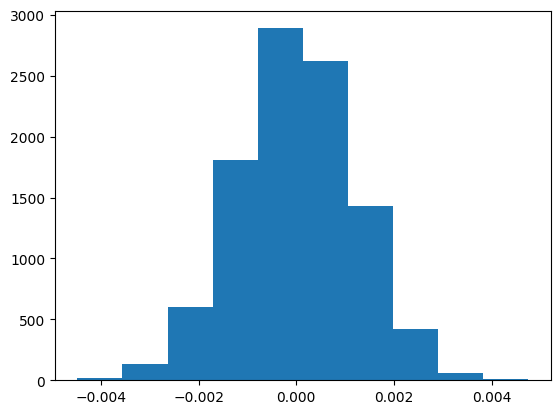

In [23]:
#plot a histogram of p_diffs
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

In [24]:
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(n_new)

In [25]:
# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(n_old)

In [26]:
#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015790565976871451

In [27]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

(array([   9.,   47.,  338., 1158., 2447., 2940., 1956.,  876.,  199.,
          30.]),
 array([-0.0048338 , -0.00392816, -0.00302251, -0.00211687, -0.00121122,
        -0.00030558,  0.00060007,  0.00150571,  0.00241136,  0.003317  ,
         0.00422265]),
 <BarContainer object of 10 artists>)

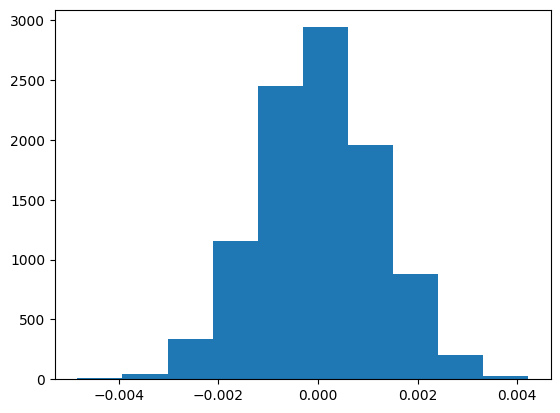

In [28]:
#Plot Null distribution
plt.hist(null_vals)

17489 17264 145274 145310


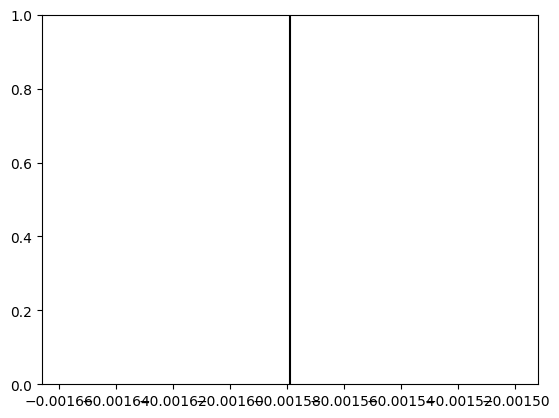

In [31]:
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='black')

import statsmodels.api as sm
convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
print(convert_old,convert_new , n_old , n_new)

In [30]:
# compute the sm.stats.proportions_ztest using the alternative
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)